In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

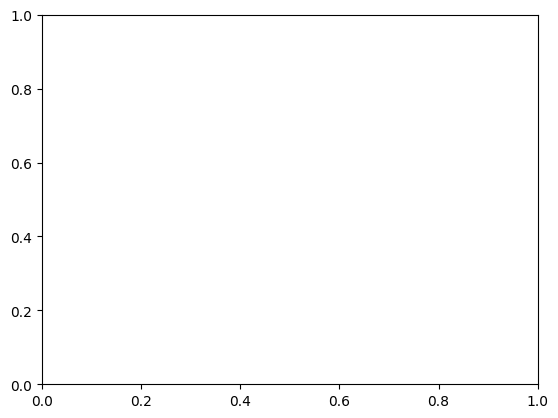

In [2]:
def truncate_label(label, length=20):
    if len(label) > length:
        return label[: length - 3] + "..."
    else:
        return label


format_long_text = [
    truncate_label(l.get_text()) for l in plt.gca().xaxis.get_ticklabels()
]


def millions_billions_formatter(x, pos):
    if x >= 1e9:
        return f"{x / 1e9:.1f}B"  # Agrega dos decimales para miles de millones
    elif x >= 1e6:
        return f"{x / 1e6:.1f}M"  # Agrega dos decimales para millones
    elif x >= 1e3:
        return f"{x / 1e3:.1f}K"  # Agrega dos decimales para miles
    else:
        return f"{x:.0f}"  # Agrega dos decimales para números menores a mil


def autoLabel():
    for bar in plt.gca().patches:
        height = bar.get_height()

        formatted_height = millions_billions_formatter(height, None)
        plt.gca().annotate(
            formatted_height,
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # Desplazamiento vertical del texto
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


formatter = FuncFormatter(millions_billions_formatter)

In [3]:
path_censo_electoral_topes = (
    "data/input/rule/230811-CENSO-ELECTORAL-CON-TOPES-2023.xlsx"
)
rule_df = pd.read_excel(
    path_censo_electoral_topes, engine="openpyxl", sheet_name="ALCALDIA"
)

rule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DEPARTAMENTO        1121 non-null   object
 1   MUNICIPIO           1121 non-null   object
 2   TOTAL               1121 non-null   int64 
 3   TOPE GASTOS         1121 non-null   int64 
 4   MAX_CURUL           1121 non-null   int64 
 5   GERENTE DE CAMPAÑA  1121 non-null   object
dtypes: int64(3), object(3)
memory usage: 52.7+ KB


In [4]:
rule_df.head()

,DEPARTAMENTO,MUNICIPIO,TOTAL,TOPE GASTOS,MAX_CURUL,GERENTE DE CAMPAÑA
0,AMAZONAS,EL ENCANTO,783,144319596,1,NO
1,AMAZONAS,LA CHORRERA,1061,144319596,1,NO
2,AMAZONAS,LA PEDRERA,1179,144319596,1,NO
3,AMAZONAS,LA VICTORIA,65,144319596,1,NO
4,AMAZONAS,LETICIA,42092,274894466,1,SI


In [5]:
rule_df.describe()

,TOTAL,TOPE GASTOS,MAX_CURUL
count,1.121000e+03,1.121000e+03,1121.0
mean,3.471822e+04,2.722576e+08,1.0
std,2.059569e+05,4.049258e+08,0.0
min,6.500000e+01,1.443196e+08,1.0
25%,5.850000e+03,1.443196e+08,1.0
50%,1.045200e+04,1.443196e+08,1.0
75%,2.147100e+04,1.443196e+08,1.0
max,6.044205e+06,5.257463e+09,1.0


### Agregar columna del tope de donación individual

In [6]:
rule_df['TOPE DONACIONES'] = rule_df['TOPE GASTOS'] * 0.1

In [7]:
rule_df.head()

,DEPARTAMENTO,MUNICIPIO,TOTAL,TOPE GASTOS,MAX_CURUL,GERENTE DE CAMPAÑA,TOPE DONACIONES
0,AMAZONAS,EL ENCANTO,783,144319596,1,NO,14431959.6
1,AMAZONAS,LA CHORRERA,1061,144319596,1,NO,14431959.6
2,AMAZONAS,LA PEDRERA,1179,144319596,1,NO,14431959.6
3,AMAZONAS,LA VICTORIA,65,144319596,1,NO,14431959.6
4,AMAZONAS,LETICIA,42092,274894466,1,SI,27489446.6


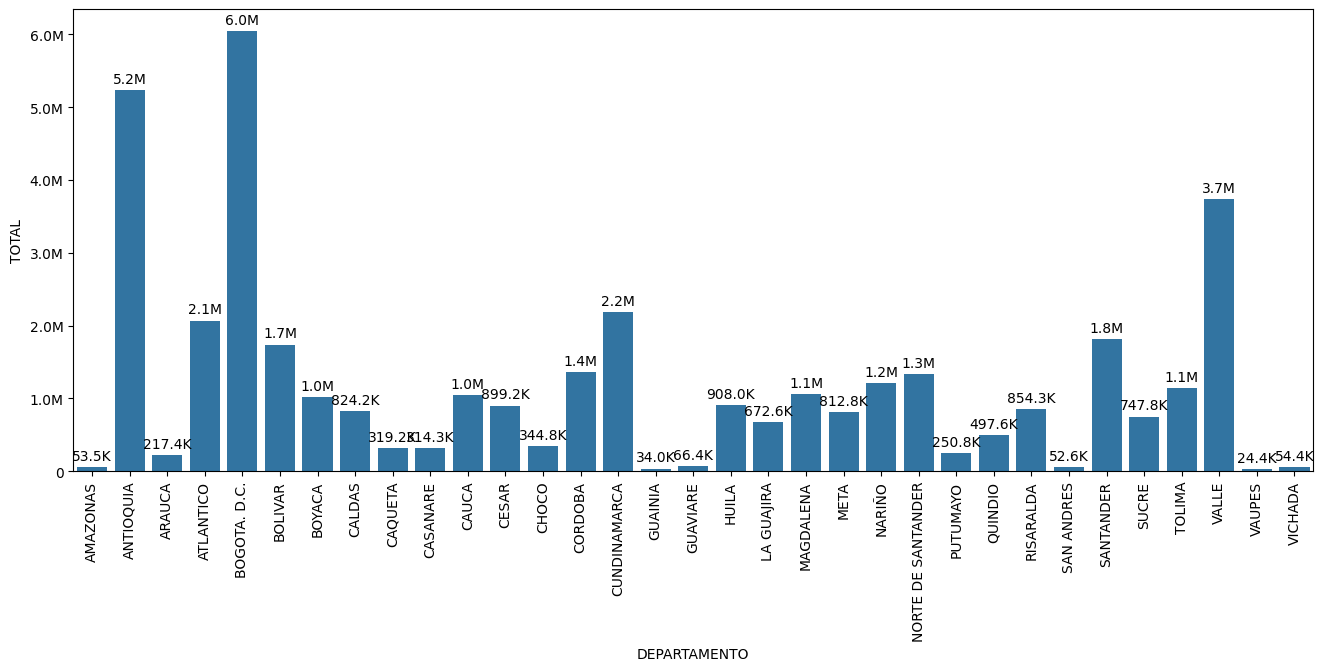

In [8]:
plt.figure(figsize=(16, 6)) 
sns.barplot(
    x="DEPARTAMENTO",
    y="TOTAL",
    data=rule_df.groupby("DEPARTAMENTO")["TOTAL"].sum().reset_index(),
)
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(formatter)
autoLabel()

plt.show()

In [9]:
output = rule_df["DEPARTAMENTO"].unique()
[len(output), output]

[33,
 array(['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLANTICO', 'BOGOTA. D.C.',
        'BOLIVAR', 'BOYACA', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA',
        'CESAR', 'CHOCO', 'CORDOBA', 'CUNDINAMARCA', 'GUAINIA', 'GUAVIARE',
        'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO',
        'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDIO', 'RISARALDA',
        'SAN ANDRES', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE', 'VAUPES',
        'VICHADA'], dtype=object)]